# Capstone 2: EDA
## Goal:
* Explore the data relationships of all your features
* Understand how the features compare to the response variable
* **Build data profiles and tables (Inferential statistics)**
    * Do any particular results in your data strike you as ​abnormal?
    * What hypotheses can you form (Null and Alternative hypotheses) which you could go on to test?
    * Recall your statistical concepts (i.e. ​p-value​ of an observation is the probability of seeing data at least as extreme as that observation, on the assumption of the null hypothesis)
* **Explore data relationships (Data visualization)**
    * Recall your ​matplotlib​ and ​seaborn​ functions for data visualization:
    * ​matplotlib:
        * plt.plot()
        * plt.xlabel()
        * plt.show()
        * plt.hist()
    * Seaborn:
        * sns.relplot()
        * sns.lmplot()
        * sns.catplot()
* **Feature Selection and Engineering**
    * Feature selection is where data storytelling starts: we tell a story as soon as we include certain features and omit others. But how we manipulate - or ​engineer - ​those fields is just as important. Recall the crucial elements to feature engineering:
    * If you have categorical features, you might need to ​one-hot encode ​them
    * You may need to ​binarize​ your columns and ​bin​ your values.
    * To handle missing data, think about how appropriate the methods of ​listwise deletion, data imputation, replacing missing values with constants ​or simply attempting to ​find the missing values ​are for your data.
    * Think about whether you need to ​standardize, log-transform ​or ​normalize ​your data, as well as statistically valid ways to remove outliers.

**Questions:**
* Are there variables that are particularly significant in terms of explaining the answer to your project question?
* Are there significant differences between subgroups in your data that may be relevant to your project aim?
* Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
* What are the most appropriate tests to use to analyze these relationships?

## Steps:
1. Explore each individual variable
    * Location: mean, median, mode, interquartile mean
    * Spread: standard deviation, variance, range, interquartile range
    * Shape: skewness, kurtosis
    * What does each field in the data look like?
    * Is the distribution skewed? Bimodal? Are there outliers? Are they feasible? Are there discontinuities? Are the typical assumptions seen in modeling valid?
    * Gaussian
    * Identically and independently distributed
    * Have one mode
    * Can be negative
    * Generating processes are stationary and isotropic (time series)
    * Independence between subjects (panel data)
2. Explore relationship between each variable and target variable
    * How does each field interact with the target? Assess each relationships's:
    * Linearity
    * Direction
    * Rough size
    * Strength
    * Methods: Bivariate visualizations, calculate correlation
3. Explore interaction between variables
    * Bivariate visualizations for all combinations
    * Correlation matrices
    * Compare summary statistics of variable x for different categories of y
4. Explore data across many dimensions
    * Parallel coordinates
    * Continuous Principal Component Analysis (PCA)
    * Clustering
  
### To do:
* Generate list of questions and hypotheses
* Create univariate plots for all fields
* Create bivariate plots for each combination of fields to find correlation and other relationships
* Plot summary statistics
* Plot distribution of x for different categories y
* Plot mean, median, min, max, count, distinct count of x for different categories of y
* Record things to watch out for/be aware of in future analyses
* Distill and present findings

# 0.) Questions and Hypotheses
### Focus questions:
1. How many of each type and breed of dog are brought into shelters across the USA in a given year?
2. Which states have the most imports of dogs and what breeds/types are they?
3. Are there any trends in the types/breeds of dogs being brought into shelters? (e.g. more pit bulls than golden retrievers)

### Smaller questions:
1. Do large or small dogs tend to be imported/exported/in shelters?
2. Which type of dog is popular in which state?
3. Which breeds are most represented? What happens if we drop the outliers?

# 1.) Load libraries and data

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 10)

In [6]:
# Load data
allDogs = pd.read_csv('clean- allDogDescription.csv')
dogTravel = pd.read_csv('clean- dogTravel.csv')
movesByLocation = pd.read_csv('clean- movesByLocation.csv')

C:\Users\yenmi\AppData\Local\Temp\ipykernel_2716\3024980330.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  allDogs = pd.read_csv('clean- allDogDescription.csv')


# 2a.) Explore (allDogs)

In [8]:
allDogs.head(3)

,org_id,breed_primary,breed_mixed,color_primary,age,sex,size,coat,fixed,house_trained,special_needs,shots_current,env_children,env_dogs,name,contact_city,contact_state,contact_zip,contact_country,description
0,NV163,American Staffordshire Terrier,True,White / Cream,Senior,Male,Medium,Short,True,True,False,True,True,True,HARLEY,Las Vegas,NV,89147,US,Harley is not sure how he wound up at shelter ...
1,NV163,Pit Bull Terrier,True,Brown / Chocolate,Adult,Male,Large,Short,True,True,False,True,True,True,BIGGIE,Las Vegas,NV,89147,US,6 year old Biggie has lost his home and really...
2,NV99,Shepherd,False,Brindle,Adult,Male,Large,Short,True,False,False,True,True,True,Ziggy,Mesquite,NV,89027,US,Approx 2 years old.\n Did I catch your eye? I ...


In [9]:
allDogs.dtypes

org_id             object
breed_primary      object
breed_mixed          bool
color_primary      object
age                object
                    ...  
contact_city       object
contact_state      object
contact_zip        object
contact_country    object
description        object
Length: 20, dtype: object

In [10]:
pd.set_option("display.max_rows", 10)
columns = allDogs.columns
for i in columns:
    print(allDogs[i].value_counts())

org_id
GA423     473
GA217     417
NY1274    309
AZ414     263
NJ376     241
         ... 
CT473       1
VA744       1
NJ517       1
CT114       1
KY499       1
Name: count, Length: 3969, dtype: int64
breed_primary
Pit Bull Terrier                7884
Labrador Retriever              7176
Chihuahua                       3758
Mixed Breed                     3237
Terrier                         2640
                                ... 
Wirehaired Pointing Griffon        1
Boykin Spaniel                     1
Old English Sheepdog               1
Belgian Shepherd / Laekenois       1
Tosa Inu                           1
Name: count, Length: 216, dtype: int64
breed_mixed
True     41549
False    16559
Name: count, dtype: int64
color_primary
Black                               7638
White / Cream                       3134
Brown / Chocolate                   2434
Tricolor (Brown, Black, & White)    2094
Brindle                             1953
                                    ... 
Golden     

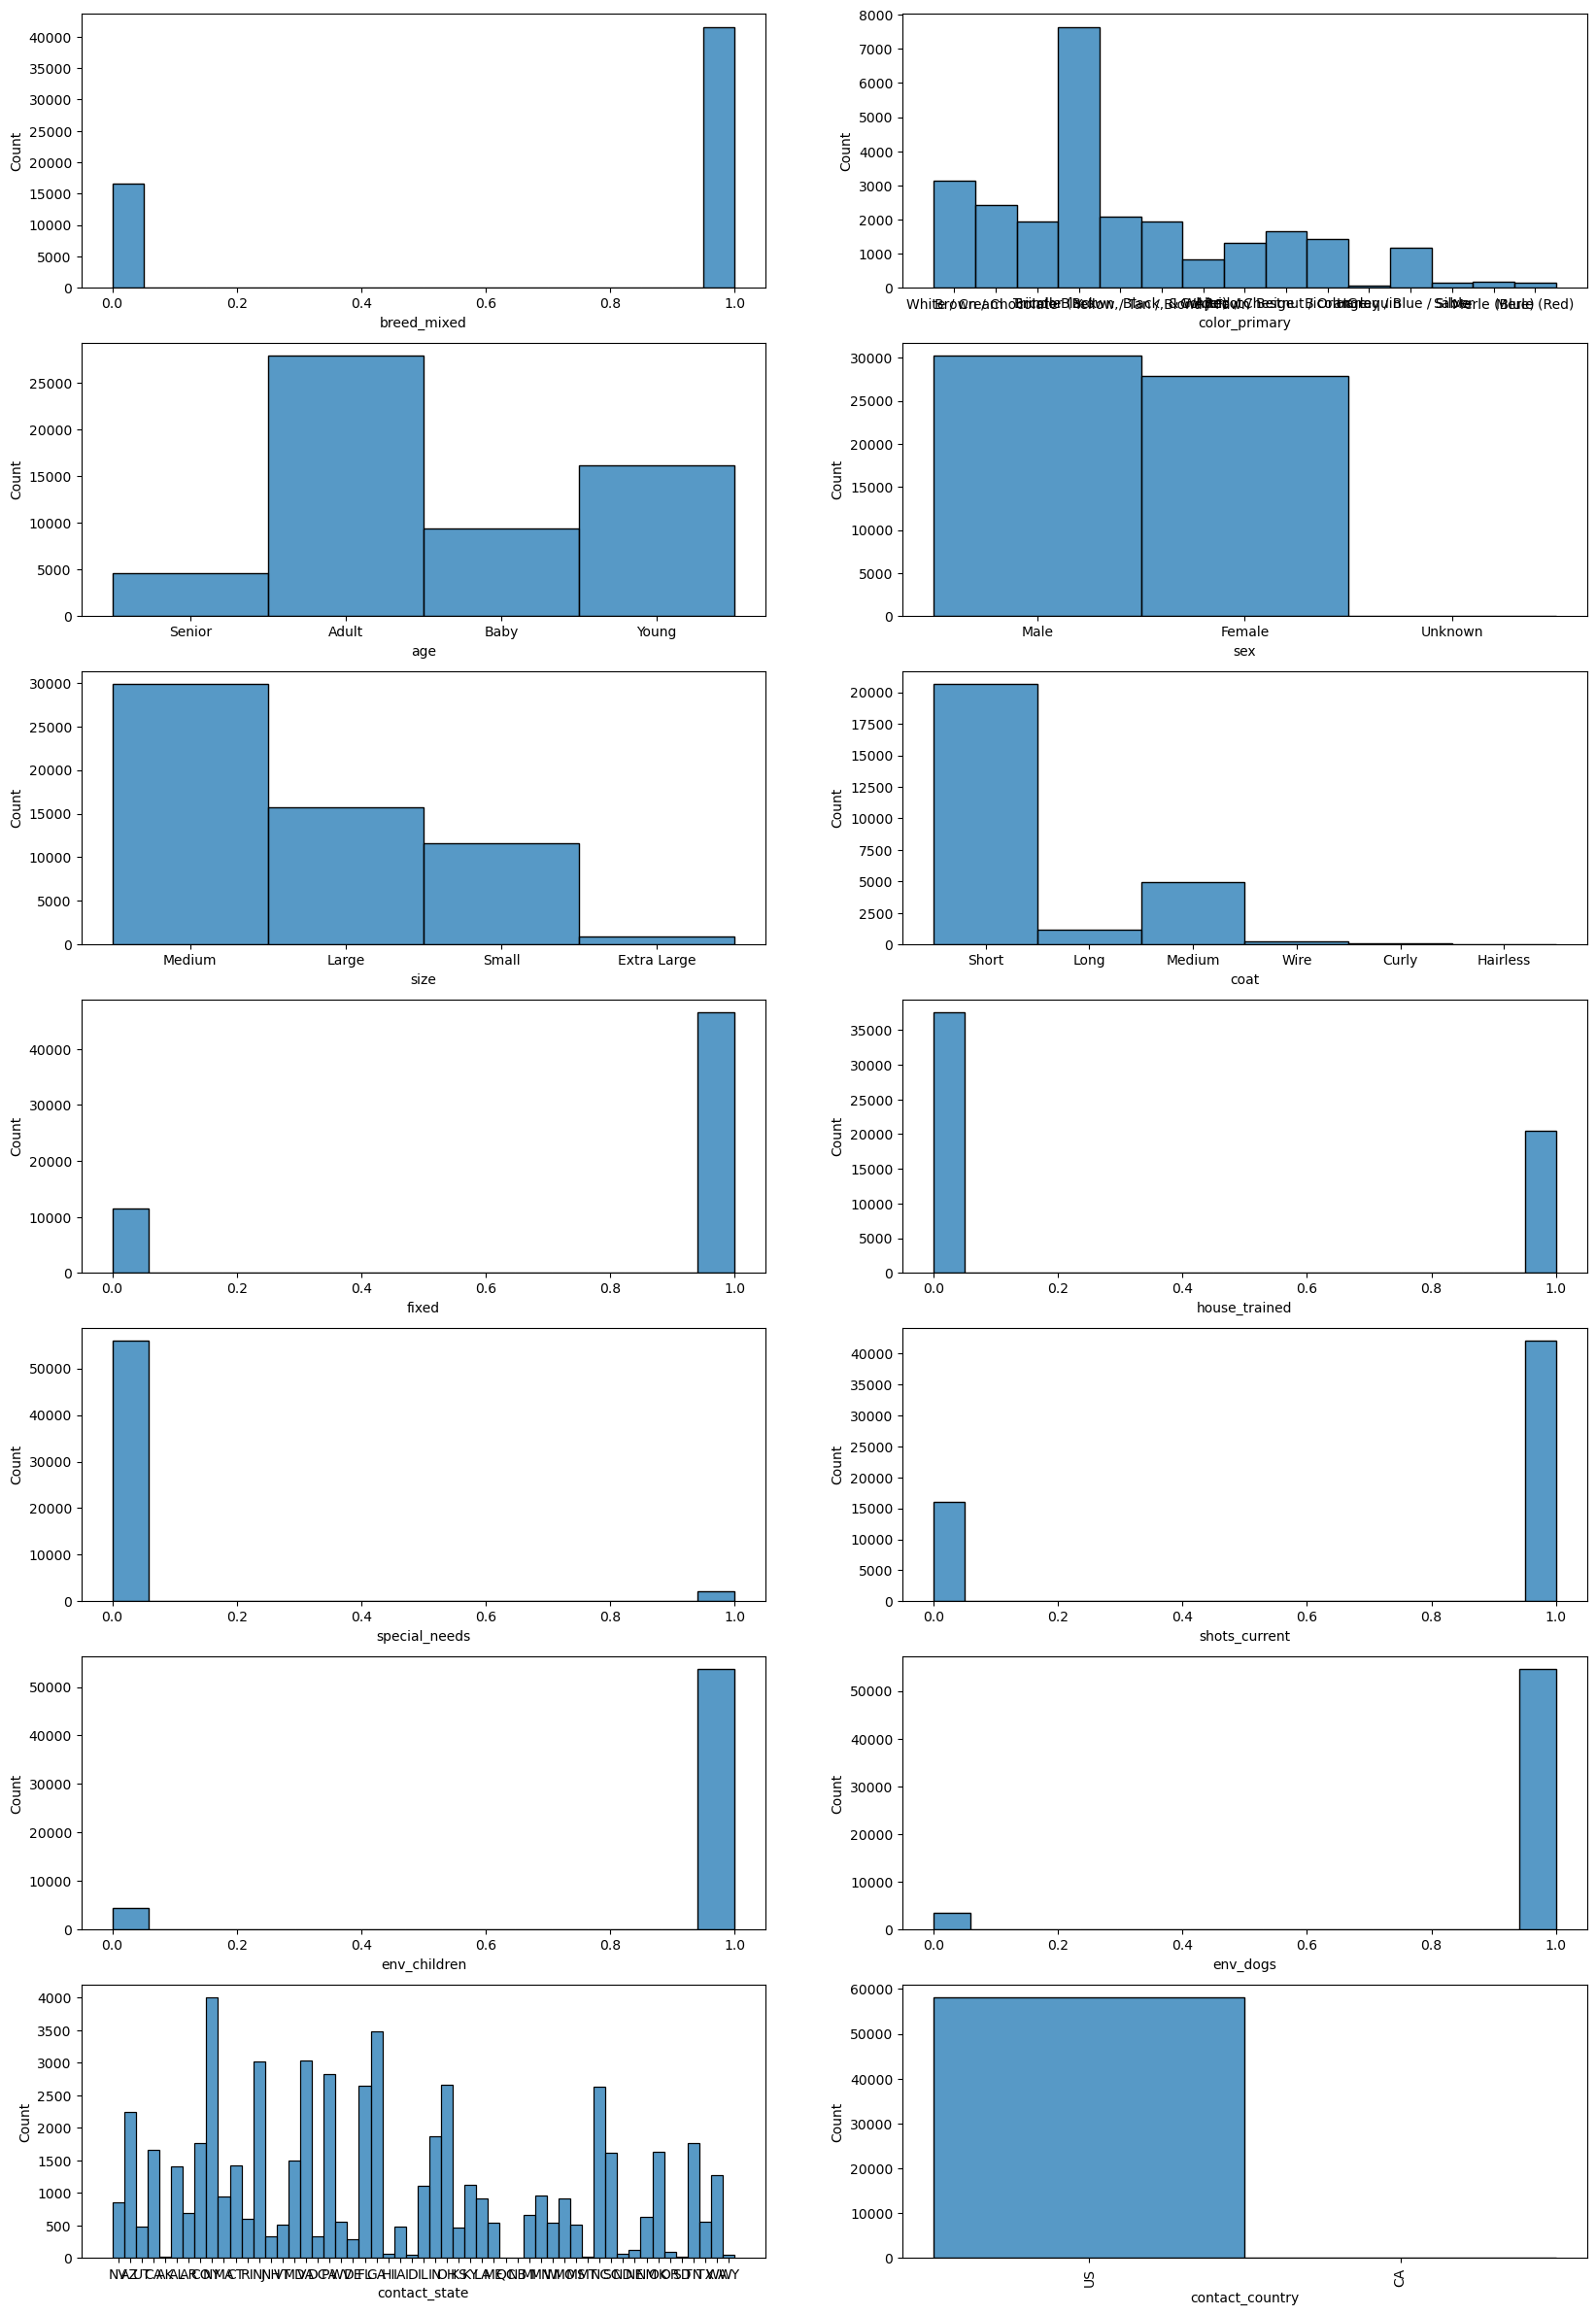

In [11]:
# histograms

columns = ['breed_mixed', 'color_primary', 'age', 'sex', 'size', 'coat', 'fixed', 'house_trained', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'contact_state', 'contact_country']
# 14 categories
# excluding ['org_id', 'breed_primary', 'name', 'contact_city', 'contact_zip', 'description']

r = 7
c = 2

fig, axes = plt.subplots(r, c, figsize=(20, 30))

a = 0
for i in range(r):
    for j in range(c):
        sns.histplot(allDogs, x=columns[a], ax=axes[i, j])
        plt.xticks(rotation=90)
        a = a + 1

plt.show()

### Exploring 'breed_primary'

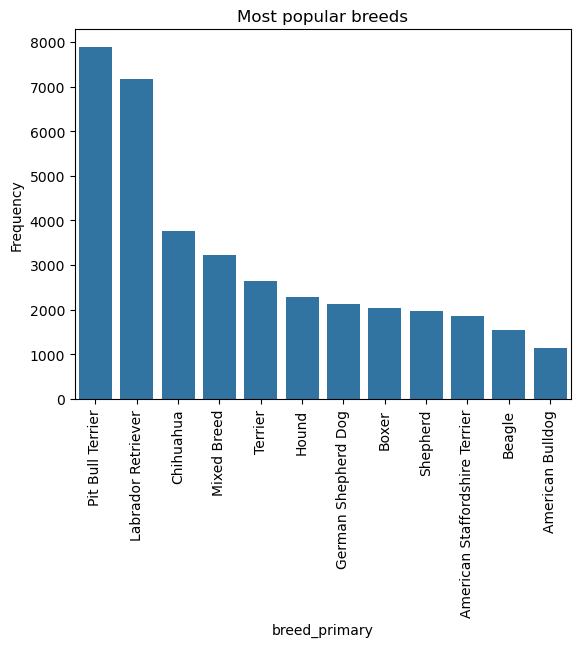

In [13]:
pd.set_option("display.max_rows", None)
breed_primary = allDogs['breed_primary'].value_counts()

# Three tiers of frequencies
most = breed_primary[breed_primary>=1000]
moderate = breed_primary[(breed_primary>=100) & (breed_primary<1000)]
least = breed_primary[breed_primary<100]

most_df = most.reset_index(name='Frequency')
most_df.rename(columns={'index': 'breed_primary'}, inplace=True)

sns.barplot(data = most_df, x='breed_primary', y='Frequency')
plt.title("Most popular breeds")
plt.xticks(rotation=90)
plt.show()

### Exploring 'contact_city' and 'contact_state'

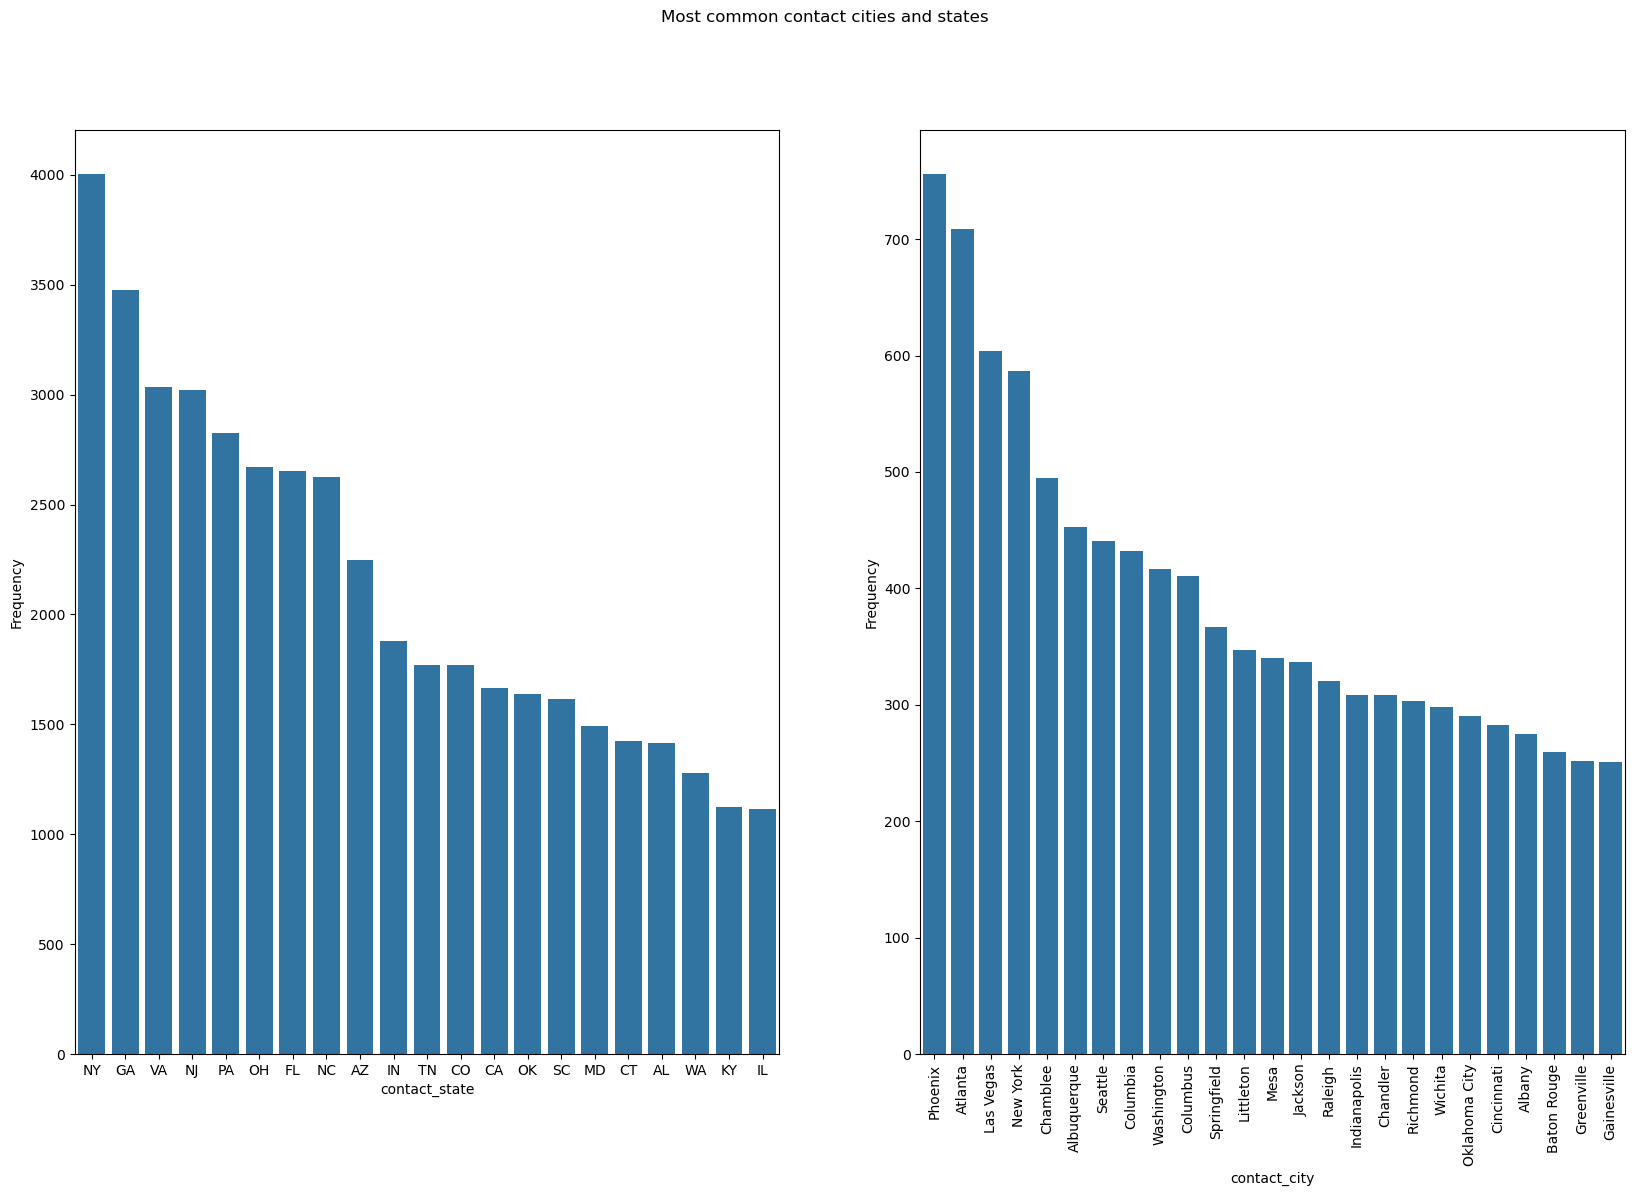

In [15]:
pd.set_option("display.max_rows", 200)
contact_city = allDogs['contact_city'].value_counts()
contact_state = allDogs['contact_state'].value_counts()

most_city = contact_city[contact_city>=250]
most_state = contact_state[contact_state>=1000]

most_city_df = most_city.reset_index(name='Frequency')
most_city_df.rename(columns={'index': 'contact_city'}, inplace=True)

most_state_df = most_state.reset_index(name='Frequency')
most_state_df.rename(columns={'index': 'contact_state'}, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
sns.barplot(data=most_state_df, x='contact_state', y='Frequency', ax=ax1)
sns.barplot(data=most_city_df, x='contact_city', y='Frequency', ax=ax2)
plt.xticks(rotation=90)
fig.suptitle("Most common contact cities and states")
plt.show()

### Add regions column

In [17]:
# Create a dataframe saying which state corresponds to which region
# U.S. Census Bureau Regional Divisions

northeast = pd.DataFrame({'state': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']})
northeast['region'] = 'Northeast'
midwest = pd.DataFrame({'state': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']})
midwest['region'] = 'Midwest'
south = pd.DataFrame({'state': ['DE', 'DC', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']})
south['region'] = 'South'
west = pd.DataFrame({'state': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']})
west['region'] = 'West'

regions = pd.concat([northeast, midwest, south, west], ignore_index=True).sort_values(by='state')
regions

,state,region
46,AK,West
30,AL,South
34,AR,South
38,AZ,West
47,CA,West
39,CO,West
0,CT,Northeast
22,DC,South
21,DE,South
23,FL,South


In [18]:
allDogs.columns

Index(['org_id', 'breed_primary', 'breed_mixed', 'color_primary', 'age', 'sex',
       'size', 'coat', 'fixed', 'house_trained', 'special_needs',
       'shots_current', 'env_children', 'env_dogs', 'name', 'contact_city',
       'contact_state', 'contact_zip', 'contact_country', 'description'],
      dtype='object')

In [19]:
# Add regions column
allDogs = allDogs.merge(regions, left_on='contact_state', right_on='state', how='left')
allDogs.drop('state', axis=1, inplace=True)
allDogs = allDogs[['org_id', 'breed_primary', 'breed_mixed', 'color_primary', 'age', 'sex', 'size', 'coat', 'fixed', 'house_trained', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'name', 'contact_city', 'contact_state', 'contact_zip', 'contact_country', 'region', 'description']]
allDogs.head()

,org_id,breed_primary,breed_mixed,color_primary,age,sex,size,coat,fixed,house_trained,...,shots_current,env_children,env_dogs,name,contact_city,contact_state,contact_zip,contact_country,region,description
0,NV163,American Staffordshire Terrier,True,White / Cream,Senior,Male,Medium,Short,True,True,...,True,True,True,HARLEY,Las Vegas,NV,89147,US,West,Harley is not sure how he wound up at shelter ...
1,NV163,Pit Bull Terrier,True,Brown / Chocolate,Adult,Male,Large,Short,True,True,...,True,True,True,BIGGIE,Las Vegas,NV,89147,US,West,6 year old Biggie has lost his home and really...
2,NV99,Shepherd,False,Brindle,Adult,Male,Large,Short,True,False,...,True,True,True,Ziggy,Mesquite,NV,89027,US,West,Approx 2 years old.\n Did I catch your eye? I ...
3,NV202,German Shepherd Dog,False,NaN,Baby,Female,Large,NaN,False,False,...,False,True,True,Gypsy,Pahrump,NV,89048,US,West,NaN
4,NV184,Dachshund,False,NaN,Young,Male,Small,Long,True,False,...,True,True,True,Theo,Henderson,NV,89052,US,West,Theo is a friendly dachshund mix who gets alon...


In [20]:
# Fill NaN
# allDogs['region'].isna().sum()
allDogs[allDogs['region'].isna()]

allDogs.fillna(value={'region': 'Canada'}, inplace=True)

# 2b.) Explore (dogTravel)

In [22]:
dogTravel.head(3)

,id,contact_city,contact_state,description,found
0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,AR
1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Bahamas
2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,MD


### Adding 'current_region' and 'found_region' as columns

In [24]:
# Merge 'region' column into the dogTravel DataFrame

# Add a 'contact_region' column
dogTravel = dogTravel.merge(regions, left_on='contact_state', right_on='state', how='left')
dogTravel.rename(columns={'region': 'contact_region'}, inplace=True)
dogTravel.drop('state', axis=1, inplace=True)
dogTravel = dogTravel[['id', 'contact_city', 'contact_state', 'contact_region', 'description', 'found']]

# Add a 'found_region' column
dogTravel = dogTravel.merge(regions, left_on='found', right_on='state', how='left')
dogTravel.rename(columns={'region': 'found_region'}, inplace=True)
dogTravel.drop(['state'], axis=1, inplace=True)
dogTravel.head(10)

,id,contact_city,contact_state,contact_region,description,found,found_region
0,44520267,Anoka,MN,Midwest,Boris is a handsome mini schnauzer who made hi...,AR,South
1,44698509,Groveland,FL,South,Duke is an almost 2 year old Potcake from Abac...,Bahamas,NaN
2,45983838,Adamstown,MD,South,Zac Woof-ron is a heartthrob movie star lookin...,MD,South
3,44475904,Saint Cloud,MN,Midwest,~~Came in to the shelter as a transfer from an...,MN,Midwest
4,43877389,Pueblo,CO,West,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN
5,43082511,Manchester,CT,Northeast,Brooke has an unusual past. She was rescued f...,Afghanistan,NaN
6,45287347,Wooster,OH,Midwest,"Tate is an adorable 2 year old, 22 pound Cocka...",OH,Midwest
7,45987719,Locust Fork,AL,South,Meet Trixie... she is a female 2yr. Old Chihua...,AL,South
8,45943086,Locust Fork,AL,South,"Meet Reba, a 2-year-old Dachshund with a sleek...",AL,South
9,45942459,Locust Fork,AL,South,What a sweet boy Moric is! A 1-year-old mix of...,AL,South


In [25]:
# Fill NaN
# dogTravel['contact_region'].isna().sum()
# dogTravel['contact_region'].isna()

values = {'contact_region': 'South', 'found_region': 'International'}
dogTravel.fillna(value=values, inplace=True)

## Look for trends on where dogs come from and where they go

In [27]:
dogTravel['contact_region']

0         Midwest
1           South
2           South
3         Midwest
4            West
          ...    
4110    Northeast
4111    Northeast
4112         West
4113        South
4114    Northeast
Name: contact_region, Length: 4115, dtype: object

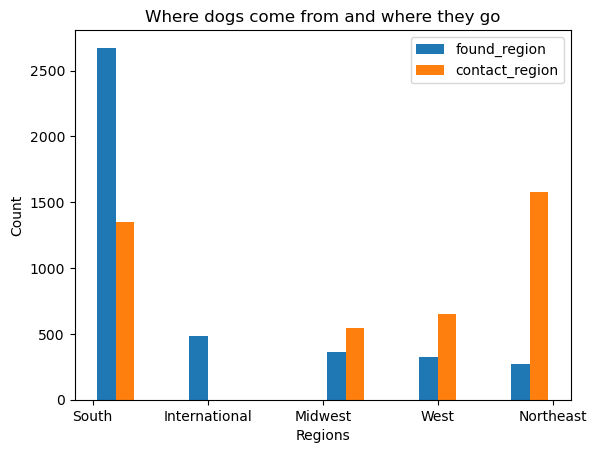

In [28]:
plt.hist([dogTravel['found_region'], dogTravel['contact_region']], label=['found_region', 'contact_region'])
# plt.figure(figsize=(10,5))
# plt.hist([dogTravel['found_region']], label=['found_region'])
# plt.hist([dogTravel['contact_region']], label=['contact_region'])
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Where dogs come from and where they go')
plt.legend(loc='upper right')
plt.show()

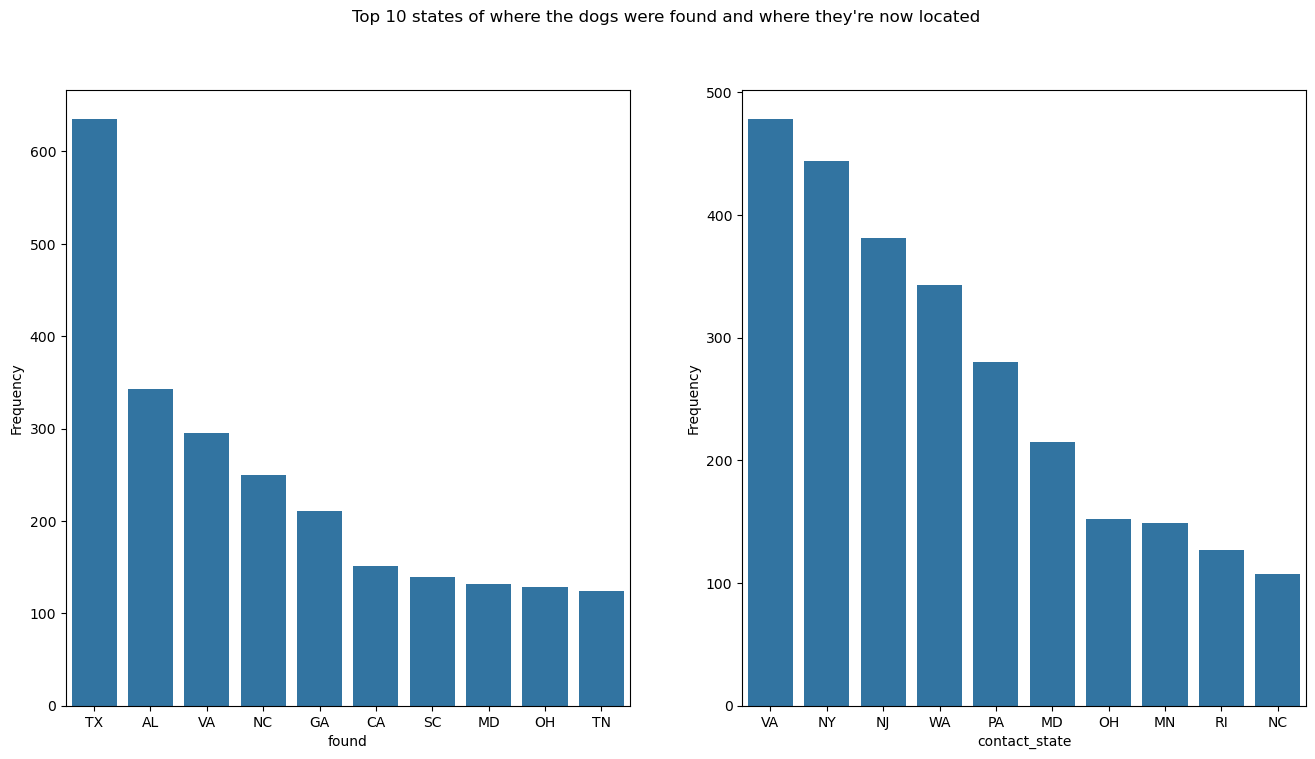

In [29]:
# Top 10 contact states and found
pd.set_option("display.max_rows", 100)
contact_state = dogTravel['contact_state'].value_counts()
found = dogTravel['found'].value_counts()

most_found_df = found.reset_index(name='Frequency').head(10)
most_found_df.rename(columns={'index': 'found'}, inplace=True)

most_state_df = contact_state.reset_index(name='Frequency').head(10)
most_state_df.rename(columns={'index': 'contact_state'}, inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=most_found_df, x='found', y='Frequency', ax=ax1)
sns.barplot(data=most_state_df, x='contact_state', y='Frequency', ax=ax2)
fig.suptitle("Top 10 states of where the dogs were found and where they're now located")
plt.show()

## Look at the states that outsource the most dogs. Where do they go?

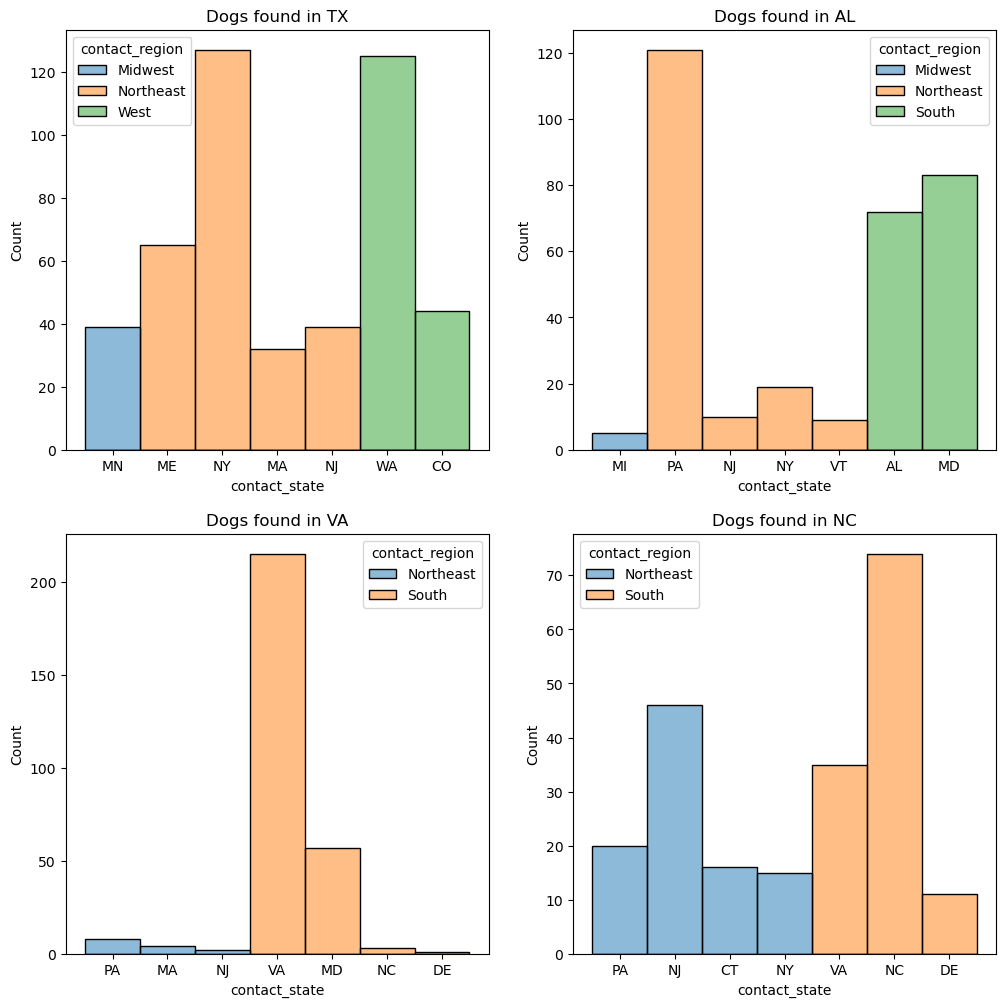

In [31]:
# For the top 4 sources of dogs, look at the top 5 states they get listed
found_states = ['TX', 'AL', 'VA', 'NC']
r, c = 2, 2
a = 0
fig, axes = plt.subplots(r, c, figsize=(12, 12))
for i in range(r):
    for j in range(c):
        sub_dataframe = dogTravel[dogTravel['found']==found_states[a]]
        series = sub_dataframe['contact_state'].value_counts()
        df = series.reset_index(name='Frequency').head(7)
        frequent_states = df['contact_state']
        df = sub_dataframe[sub_dataframe['contact_state'].isin(frequent_states)].sort_values(by='contact_region')
        sns.histplot(df, x='contact_state', hue='contact_region', ax=axes[i, j])
        axes[i, j].set_title('Dogs found in ' + found_states[a])
        a = a + 1
plt.show()

# 2c.) Explore (movesByLocation)

In [33]:
movesByLocation

,location,exported,imported,total,inUS
0,Texas,635.0,NaN,566.0,True
1,Alabama,268.0,2.0,1428.0,True
2,North Carolina,158.0,14.0,2627.0,True
3,South Carolina,139.0,12.0,1618.0,True
4,Georgia,137.0,19.0,3479.0,True
5,Puerto Rico,131.0,NaN,NaN,False
6,California,130.0,3.0,1664.0,True
7,South Korea,76.0,NaN,NaN,False
8,Tennessee,66.0,20.0,1769.0,True
9,Kentucky,57.0,4.0,1123.0,True


In [34]:
# Drop Indianapolis, and add +1 to exported for Indiana
movesByLocation.drop(66, inplace=True)
movesByLocation = movesByLocation.reset_index(drop=True)

# Add +1 to exported for Indiana
movesByLocation.loc[26, 'exported'] += 1

In [35]:
# Costa Rica shows up twice
movesByLocation.drop(42, inplace=True)

### Add regions column

In [37]:
# Change state names to abbreviations
states = {
    'Alabama': 'AL', 
    'Alaska': 'AK', 
    'Arizona': 'AZ', 
    'Arkansas': 'AR', 
    'California': 'CA', 
    'Colorado': 'CO', 
    'Connecticut': 'CT', 
    'Delaware': 'DE', 
    'Florida': 'FL', 
    'Georgia': 'GA', 
    'Hawaii': 'HI',  
    'Idaho': 'ID', 
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA', 
    'Kansas': 'KS', 
    'Kentucky': 'KY', 
    'Louisiana': 'LA',
    'Maine': 'ME', 
    'Maryland': 'MD', 
    'Massachusetts': 'MA', 
    'Michigan': 'MI',
    'Minnesota': 'MN', 
    'Mississippi': 'MS',
    'Missouri': 'MO', 
    'Montana': 'MT',
    'Nebraska': 'NE', 
    'Nevada': 'NV',
    'New Hampshire': 'NH', 
    'New Mexico': 'NM',
    'New Jersey': 'NJ',
    'New York': 'NY',
    'North Carolina': 'NC', 
    'North Dakota': 'ND', 
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR', 
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 
    'South Carolina': 'SC', 
    'South Dakota': 'SD', 
    'Tennessee': 'TN',
    'Texas': 'TX', 
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA', 
    'Washington': 'WA', 
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

movesByLocation['location'] = movesByLocation['location'].replace(states)

# Create a dataframe saying which country corresponds to which continent
northamerica = pd.DataFrame({'state': ['Mexico', 'Canada']})
northamerica['region'] = 'North America'
centralamerica = pd.DataFrame({'state': ['Costa Rica', 'Honduras']})
centralamerica['region'] = 'Central America'
southamerica = pd.DataFrame({'state': ['Aruba']})
southamerica['region'] = 'South America'
caribbean = pd.DataFrame({'state': ['Puerto Rico', 'Bahamas', 'Haiti', 'Costa Rica', 'British Virgin Islands', 'Cayman Islands', 'St. Thomas', 'St. Croix', 'St. Maarten', 'St. Simon', 'Nevis']})
caribbean['region'] = 'Caribbean'
europe = pd.DataFrame({'state': ['Spain', 'Greece', 'Russia', 'England', 'Bosnia', 'Finland', 'Ireland', 'Turkey']})
europe['region'] = 'Europe'
asia = pd.DataFrame({'state': ['South Korea', 'China', 'Thailand', 'India', 'Taiwan']})
asia['region'] = 'Asia'
middleeast = pd.DataFrame({'state': ['Egypt', 'Oman', 'Kuwait', 'Qatar', 'Afghanistan', 'Azerbaijan', 'Bahrain', 'Iran', 'Saudi Arabia', 'United Arab Emirates']}) 
middleeast['region'] = 'Middle East'

worldregions = pd.concat([regions, northamerica, centralamerica, southamerica, caribbean, europe, asia, middleeast], ignore_index=True).sort_values(by='state')

In [38]:
# Add regions column
movesByLocation = movesByLocation.merge(worldregions, left_on='location', right_on='state', how='left')
movesByLocation.drop('state', axis=1, inplace=True)
movesByLocation = movesByLocation[['location', 'region', 'exported', 'imported', 'total', 'inUS']]

movesByLocation.sort_values(by='inUS')

,location,region,exported,imported,total,inUS
25,Bahamas,Caribbean,13.0,NaN,NaN,False
21,Taiwan,Asia,18.0,NaN,NaN,False
71,Saudi Arabia,Middle East,1.0,NaN,NaN,False
23,Egypt,Middle East,15.0,NaN,NaN,False
59,Bosnia,Europe,1.0,NaN,NaN,False
60,British Virgin Islands,Caribbean,1.0,NaN,NaN,False
69,Nevis,Caribbean,1.0,NaN,NaN,False
39,Qatar,Middle East,4.0,NaN,NaN,False
61,Canada,North America,1.0,NaN,NaN,False
66,Ireland,Europe,1.0,NaN,NaN,False


### Look within the U.S. and notice any patterns.

In [40]:
USA = movesByLocation[movesByLocation['inUS']]
USA.groupby('region').sum()

,location,exported,imported,total,inUS
region,,,,,
Midwest,INMOOHILNEKSWIIANDSDMNMI,51.0,233.0,9917.0,12
Northeast,NYPANJCTMAMERIVTNH,39.0,1268.0,14210.0,9
South,TXALNCSCGATNKYMSLAWVFLARVAOKMDDE,1747.0,444.0,24434.0,16
West,CANMAZUTIDCOHIWANVORWYMTAK,187.0,504.0,9234.0,13


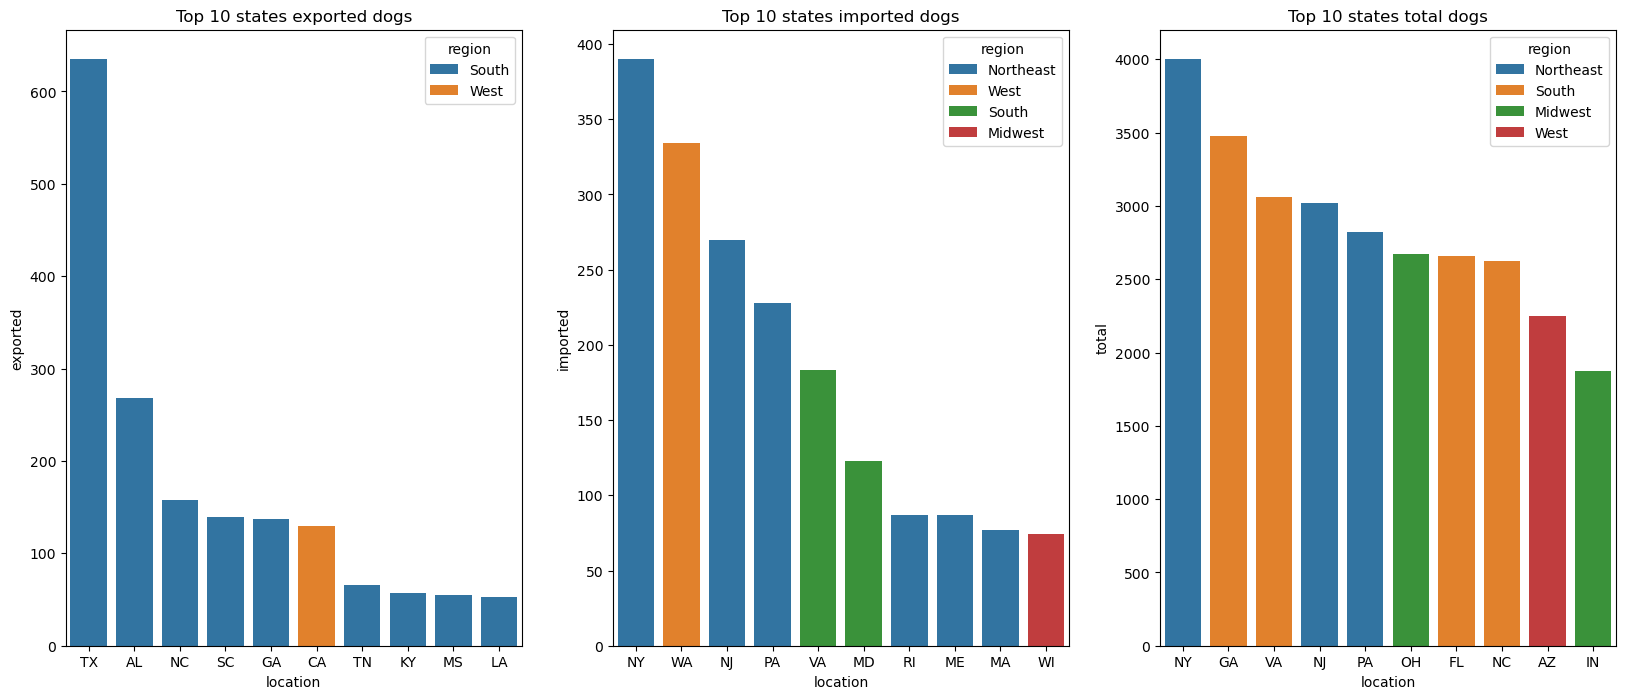

In [41]:
# Visuals of top 10 exports, top 10 imports, and top 10 totals

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
col = ['exported', 'imported', 'total']
for i in range(3):
    df = USA.sort_values(by=col[i], ascending=False).head(10)
    sns.barplot(data=df, x='location', y=col[i], hue='region', ax=axes[i]).set(title='Top 10 states ' + col[i] + ' dogs')
plt.show()

### Is there a negative relationship between large importers and large exporters?

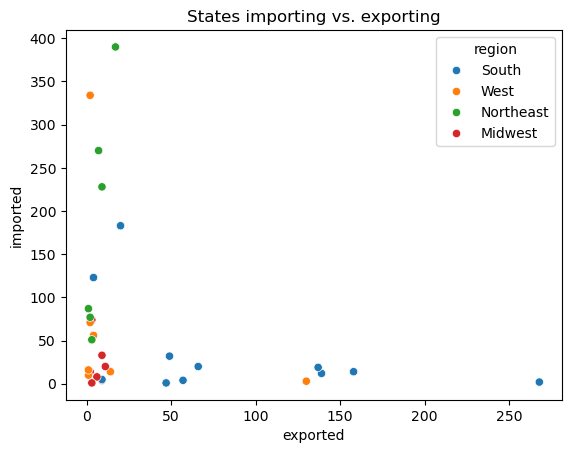

In [43]:
sns.scatterplot(data=USA, x='exported', y='imported', hue='region')
plt.title("States importing vs. exporting")
plt.show()

### Look at patterns for international dogs

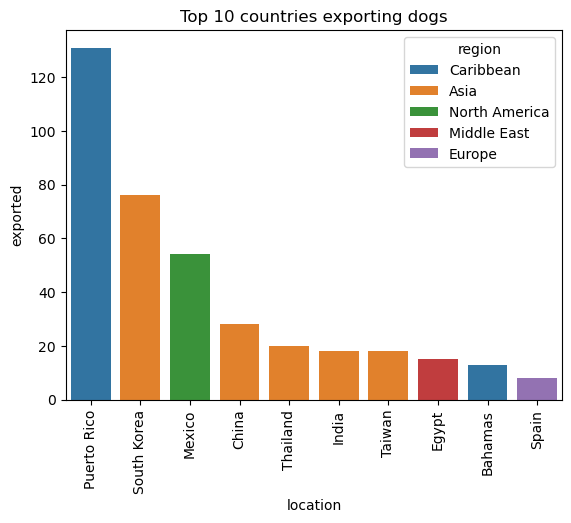

In [45]:
# Top 10 international exports
international = movesByLocation[movesByLocation['inUS']==False]

df = international.sort_values(by='exported', ascending=False).head(10)
sns.barplot(data=df, x='location', y='exported', hue='region').set(title='Top 10 countries exporting dogs')
plt.xticks(rotation=90) 
plt.show()

# 3.) Which breeds are more popular in different states?

['NY', 'GA', 'VA', 'NJ', 'PA', 'WA', 'TX', 'AL', 'NC', 'SC'] 10


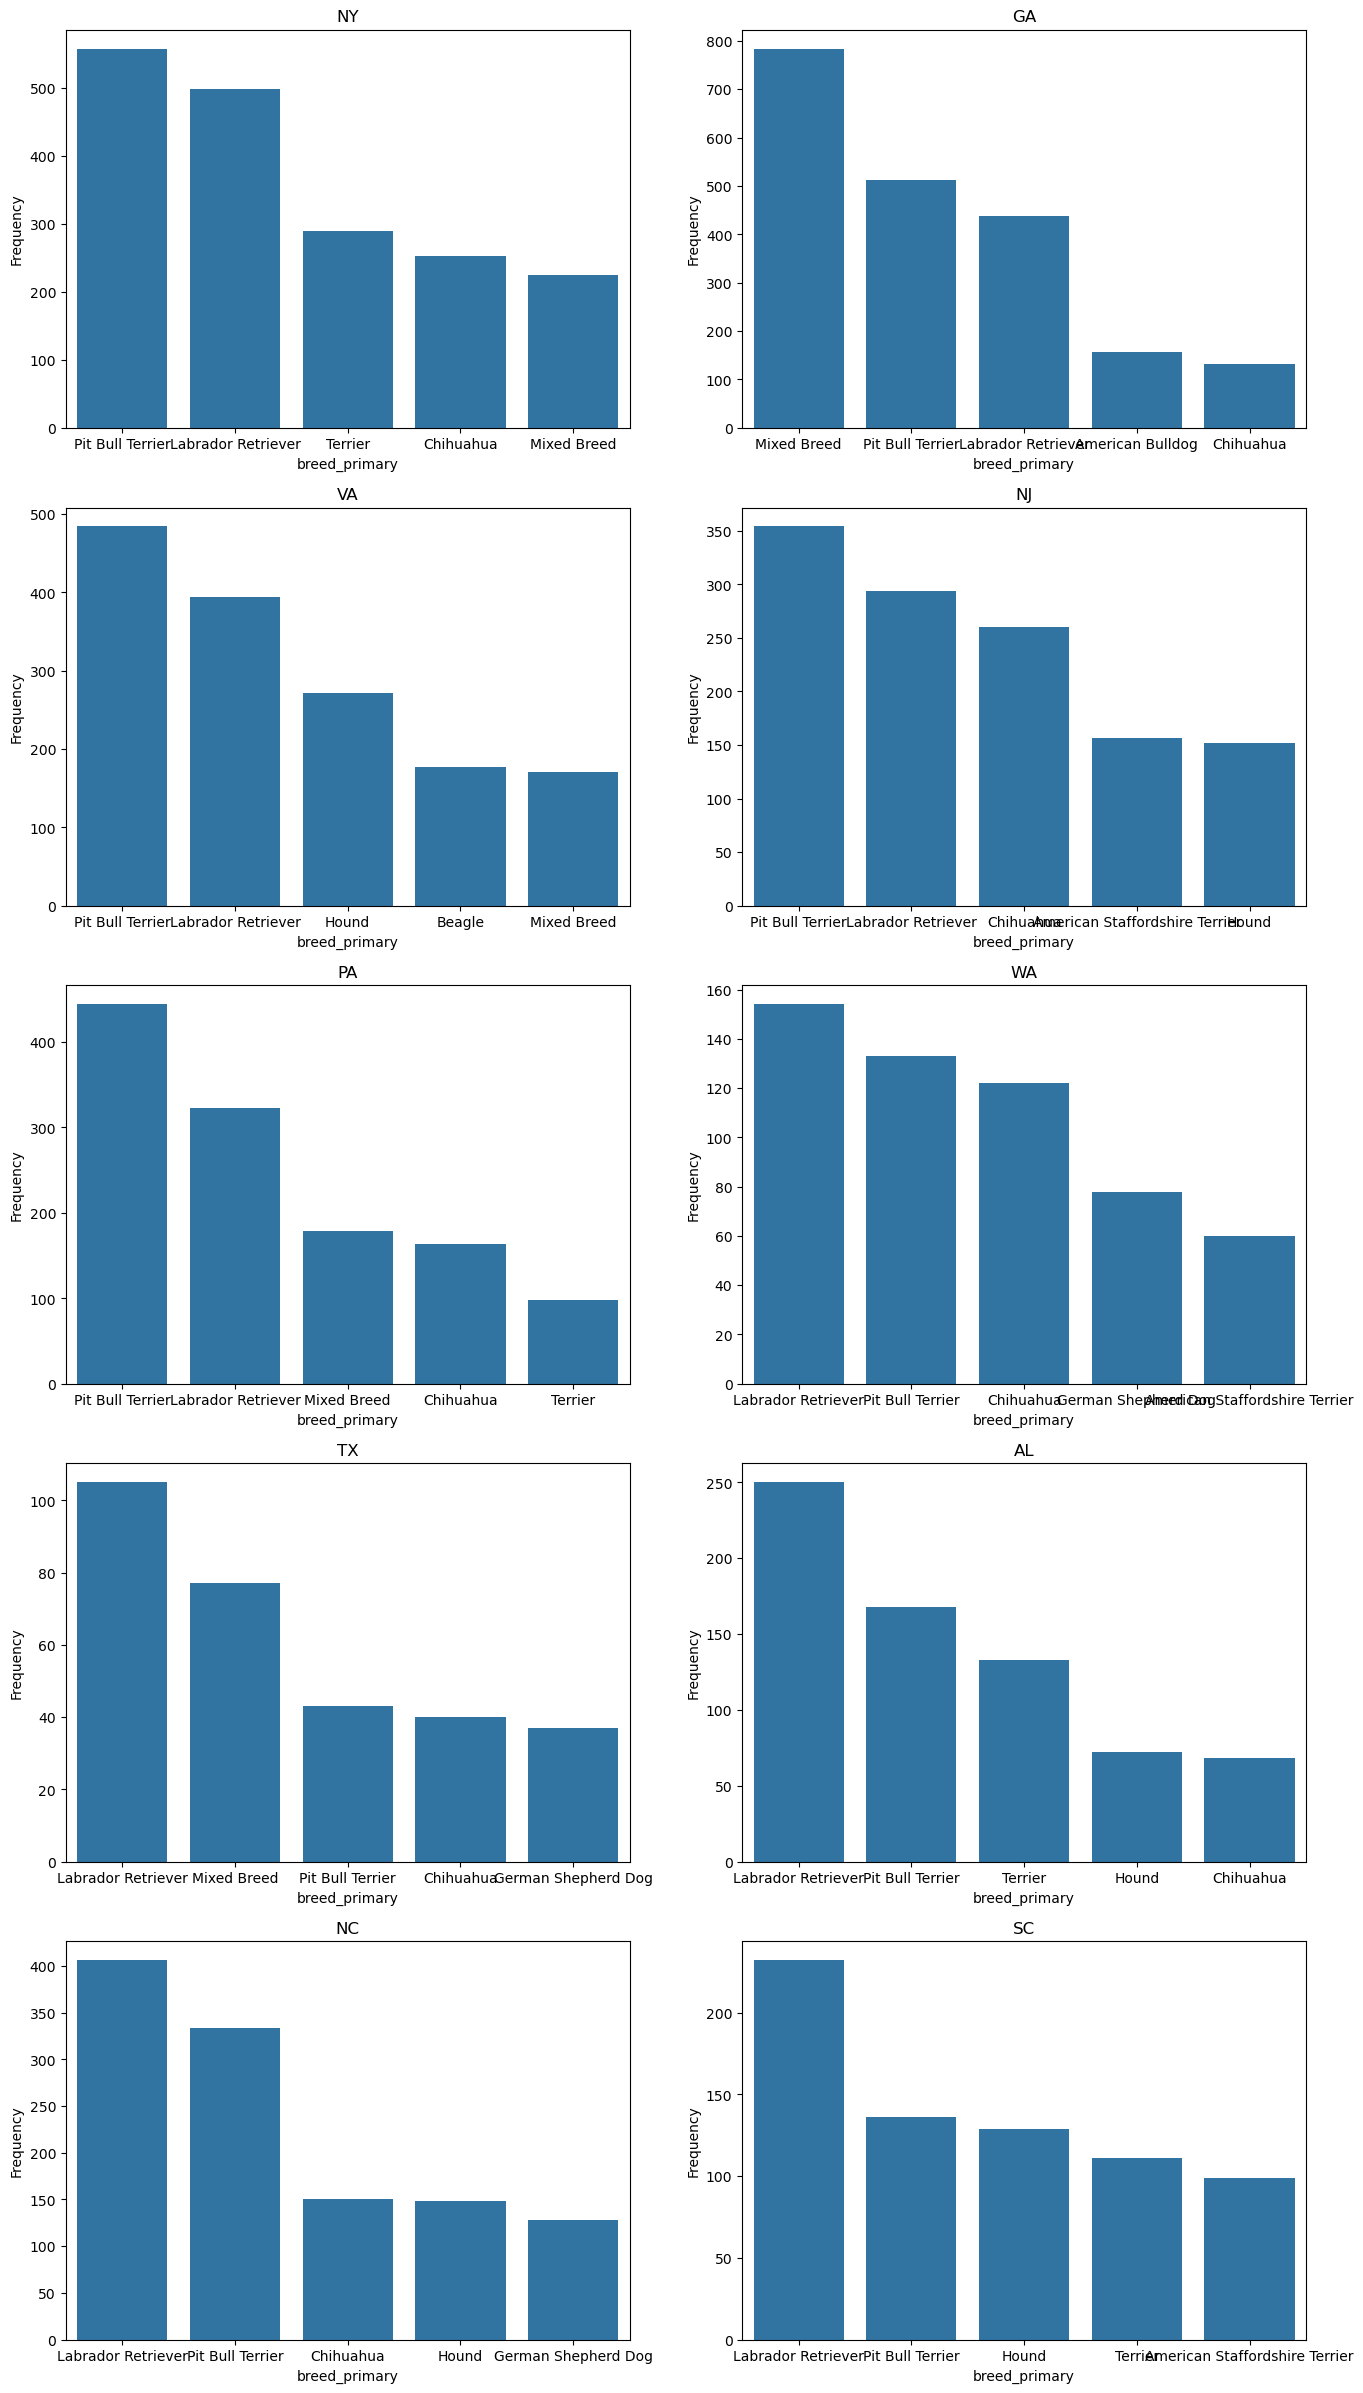

In [47]:
# First, identify the key states from each dataframe
def key_states_1(df, x):
    # returns list of top 10 key states
    count = df['contact_state'].value_counts()
    count_df = count.reset_index(name='Frequency')
    most = count_df.head(x)
    return (most['contact_state'].to_list())

def key_states_2(df, feature, x):
    # returns list of top 10 key states, based on feature
    most = df.sort_values(by=feature, ascending=False).head(x)
    return(most['location'].to_list())

key_states_list = []
topx = 5
lists = [key_states_1(allDogs, topx), key_states_1(dogTravel, topx), key_states_2(USA, 'exported', topx), key_states_2(USA, 'imported', topx), key_states_2(USA, 'total', topx)]
for list in lists:
    for element in list:
        if element not in key_states_list:
            key_states_list.append(element)
print(key_states_list, len(key_states_list))

fig, axes = plt.subplots(5, 2, figsize=(16, 30))

a = 0
for i in range(5):
    for j in range(2):
        state = key_states_list[a]
        df = allDogs[allDogs['contact_state']==state].breed_primary.value_counts().nlargest(n=5).reset_index(name='Frequency')
        sns.barplot(data=df, x='breed_primary', y='Frequency', ax=axes[i, j]).set(title=state)
        a += 1
plt.show()

# 4.) Is there a correlation with region and being fixed?

In [49]:
# Calculate percentage of dogs fixed per state
fixed_ratio = allDogs.groupby('contact_state').fixed.sum() / allDogs.groupby('contact_state').fixed.count() * 100
fixed_ratio.sort_values()

contact_state
HI     47.826087
WV     53.982301
SD     54.166667
AL     64.573042
CA     68.870192
TX     69.642857
NC     69.737343
GA     70.644048
MS     71.568627
SC     76.252319
KS     76.808511
VA     77.305665
NM     77.551020
NJ     78.204704
LA     78.641840
NY     78.796204
PA     78.867257
NE     80.000000
DC     80.059524
TN     80.350085
MD     80.643001
IN     80.787653
AR     81.007194
DE     81.081081
WI     81.180812
OR     81.318681
OH     81.828400
KY     82.635797
CO     82.655367
WY     82.692308
WA     82.968750
MT     83.333333
CT     83.614627
IA     84.536082
VT     85.461690
AK     86.666667
IL     87.085202
ND     87.500000
FL     87.716654
NV     88.564761
OK     89.242054
MI     89.269747
RI     89.456343
MN     89.874739
ME     89.908257
AZ     90.306803
UT     90.927835
MO     91.956522
QC     92.857143
MA     93.763214
NH     94.029851
ID     95.918367
NB    100.000000
Name: fixed, dtype: float64

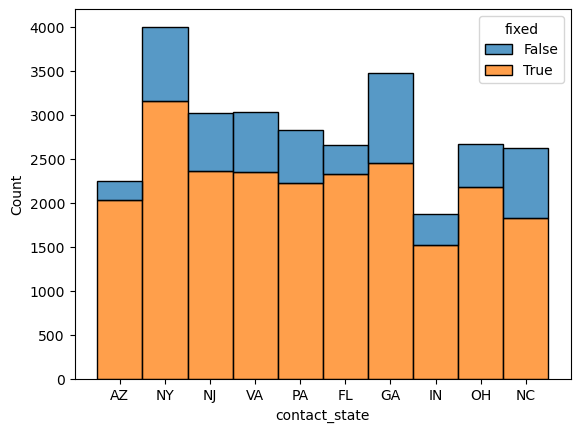

In [50]:
df = allDogs[allDogs['contact_state'].isin(key_states_1(allDogs, 10))]
sns.histplot(data=df, x='contact_state', hue='fixed', multiple='stack')
plt.show()

# 5.) Save updated csv

In [52]:
allDogs.to_csv('clean2- allDogDescription.csv', index=False)
dogTravel.to_csv('clean2- dogTravel.csv', index=False)
movesByLocation.to_csv('clean2- movesByLocation.csv', index=False)